## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter('ignore')

# Datasets
from sklearn import datasets

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Model
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Visualize DecisionTree
from graphviz import Source
from sklearn.tree import export_graphviz
from IPython.display import SVG

### 調參

In [16]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 轉成 DataFrame 比較方便觀察
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
display(iris_df.head())

# 檢查資料
X = iris_df # X 需要為一個 matrix
y = iris.target

# 切分訓練集/測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [29]:
# 建立一個 DecisionTree 模型
dct_clf = DecisionTreeClassifier()

# Model training and hyper-parameters tuning
dct_clf_param_grid = {"criterion": ["gini", "entropy"],
                      "max_depth": [3, 5, 10, 20, None],
                      "min_samples_split": [2, 3, 5, 8, 10],
                      "min_samples_leaf": [1, 2, 5],
                      "max_features": ["sqrt", "log2", None]}

gsdct_clf = GridSearchCV(dct_clf, param_grid=dct_clf_param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=1)
gsdct_clf.fit(X_train, y_train)


# Best score
print(f"Best CV score of DecisionTreeClassifier: {(gsdct_clf.best_score_):.5f}")

# Best parameters
gsdct_clf_best = gsdct_clf.best_estimator_
print("Best parameters of DecisionTreeClassifier:\n", gsdct_clf_best)

# Predict by model
y_pred = gsdct_clf_best.predict(X_test)

# Acuuracy
print(f"Accuracy of best DecisionTreeClassifier: {accuracy_score(y_test, y_pred):.5f}")

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:   12.8s


Best CV score of DecisionTreeClassifier: 0.97321
Best parameters of DecisionTreeClassifier:
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy of best DecisionTreeClassifier: 0.97368


[Parallel(n_jobs=-1)]: Done 2250 out of 2250 | elapsed:   20.4s finished


### 紅酒資料集

In [11]:
# 讀取紅酒資料集(分類問題)，其中 wine 為一個字典
wine = datasets.load_wine()

# 轉成 DataFrame 比較方便觀察
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
display(wine_df.head())

# 使用資料集中的所有特徵
X = wine_df # X 需要為一個 matrix
y = wine.target

# 切分訓練集/測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# 建立模型
log_reg = LogisticRegression()
dct_clf = DecisionTreeClassifier()

# 訓練模型
log_reg.fit(X_train, y_train)
dct_clf.fit(X_train, y_train)

# 預測測試集
y_pred_log = log_reg.predict(X_test)
y_pred_dct = dct_clf.predict(X_test)

# 分類問題的衡量採用 accuracy
print(f"Accuracy of LogisticRegression: {accuracy_score(y_test, y_pred_log):.5f}")
print(f"Accuracy of DecisionTreeClassifier: {accuracy_score(y_test, y_pred_dct):.5f}")

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Accuracy of LogisticRegression: 1.00000
Accuracy of DecisionTreeClassifier: 1.00000


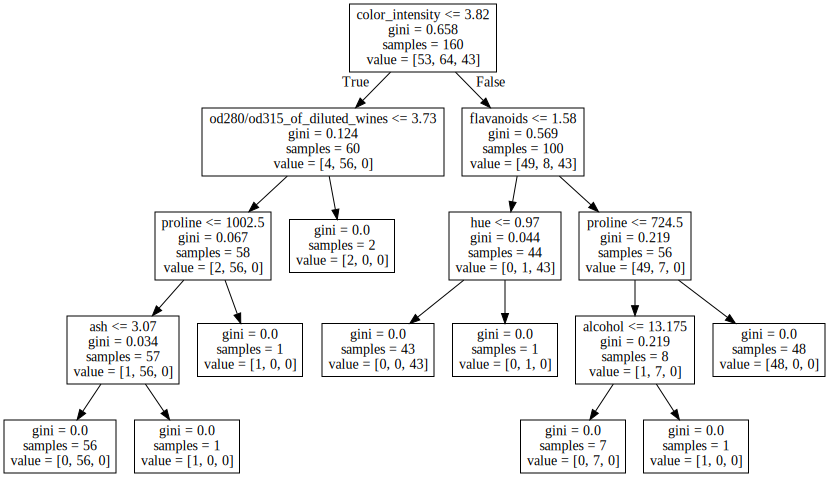

In [12]:
graph = Source(export_graphviz(dct_clf, out_file=None, feature_names=wine.feature_names))
SVG(graph.pipe(format='svg'))

### 波士頓房產資料集

In [13]:
# 讀取波士頓房產資料集(回歸問題)，其中 boston 為一個字典
boston = datasets.load_boston()

# 轉成 DataFrame 比較方便觀察
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
display(boston_df.head())

# 使用資料集中的所有特徵
X = boston_df # X 需要為一個 matrix
y = boston.target

# 切分訓練集/測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# 建立模型
lin_reg = LinearRegression()
dct_reg = DecisionTreeRegressor()

# 訓練模型
lin_reg.fit(X_train, y_train)
dct_reg.fit(X_train, y_train)

# 預測測試集
y_pred_lin = lin_reg.predict(X_test)
y_pred_dct = dct_reg.predict(X_test)

# 回歸問題的衡量採用 MSE 及 R square
print(f"Mean squared error of LinearRegression: {mean_squared_error(y_test, y_pred_lin):.5f}")
print(f"R square of LinearRegression: {r2_score(y_test, y_pred_lin):.5f}")
print(f"Mean squared error of DecisionTreeRegressor: {mean_squared_error(y_test, y_pred_dct):.5f}")
print(f"R square of DecisionTreeRegressor: {r2_score(y_test, y_pred_dct):.5f}")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Mean squared error of LinearRegression: 41.72458
R square of LinearRegression: 0.51497
Mean squared error of DecisionTreeRegressor: 31.93333
R square of DecisionTreeRegressor: 0.62879


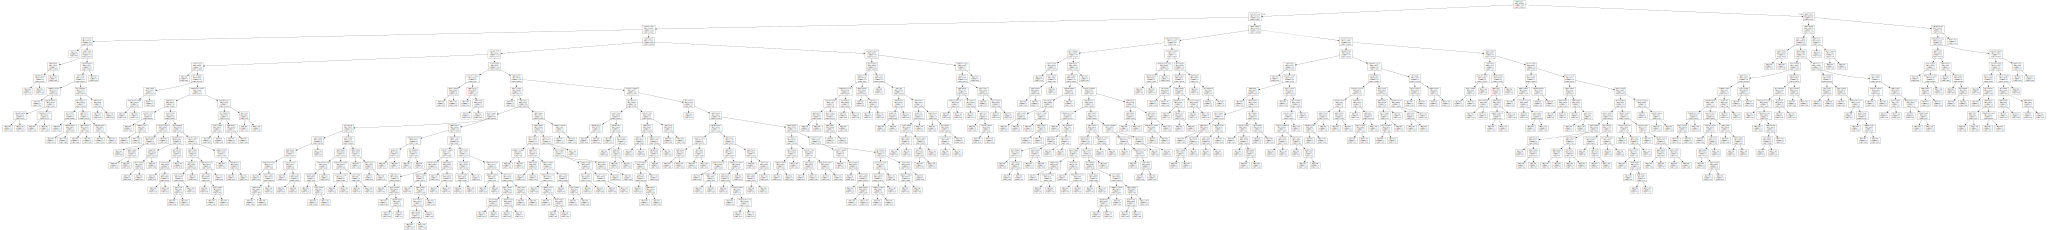

In [14]:
graph = Source(export_graphviz(dct_reg, out_file=None, feature_names=boston.feature_names))
SVG(graph.pipe(format='svg'))